# Gradient Descent (Lineal Regresion)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

(400, 1) (100, 1)


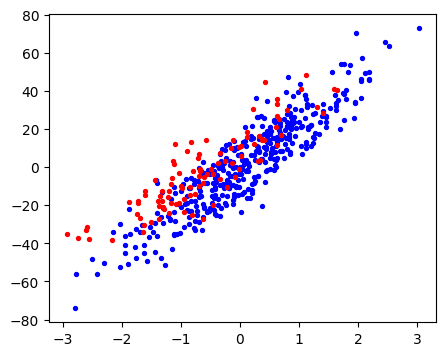

In [2]:
X, y = make_regression(n_samples = 500, n_features = 1 , noise = 10, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_test -= 0.5

_, ax = plt.subplots(figsize=(5, 4))
plt.scatter( X_train , y_train ,  c='b', s=8)
plt.scatter( X_test , y_test ,  c='r', s=8)
print (X_train.shape, X_test.shape)

In [3]:
def mse (y_true, y_pred):
  return np.square(y_true - y_pred).mean()

Useful definitions:

$\Large{y = mx_i + b }$ \\

$J = \Large{\frac{1}{n} \sum^{n}_{i=1} (y_i - mx_i + b)^2 }$

In [15]:
# Parameter definition
epochs = 100
learning_rate = 0.05
stop_criteria = 1e-3

# Initial values
m = 1000
b = 1

# Additional options
display_step = 5
n = len(X_train)
loss = []

# Optimization process
for epoch in range(epochs) :
    # Gradient initialization
    m_gradient  = 0
    b_gradient  = 0
    epoch_error = 0

    # Compute error and gradients
    for i in range(0, n ):
        #
        prediction = m * X_train[i] + b
        error = mse(y_train[i], prediction )

        # Compute the gradients
        m_gradient -= 2 * (y_train[i] - prediction) * X_train[i]
        b_gradient -= 2 * (y_train[i] - prediction)
        epoch_error += error

    m_gradient = m_gradient / n
    b_gradient = b_gradient / n

    # Update params
    m = m - (learning_rate * m_gradient )
    b = b - (learning_rate * b_gradient )

    # Save average error as loss
    loss.append(epoch_error / n)

    # Show everything every display_step epochs
    if epoch % display_step == 0:
        plt.scatter(X_train, y_train)
        # line between min-max--points
        pred_x = [min(X_train), max(X_train)]
        pred_y = [m * min(X_train) + b, m * max(X_train) + b ]
        plt.title('Epoch: {0}, MSE: {1}'.format(epoch, epoch_error / n))
        plt.plot(pred_x, pred_y, "r")
        plt.show()
        plt.pause(1)
        clear_output(wait=False)

    # Convergence condition
    if max(abs(learning_rate * m_gradient), abs(learning_rate * b_gradient)) < stop_criteria:
        break


# Impresión de los resultados
print("Computed values are: ", m, b)
print("Finished in ", epoch, " epochs ")

Computed values are:  [22.22069305] [-0.08399105]
Finished in  99  epochs 


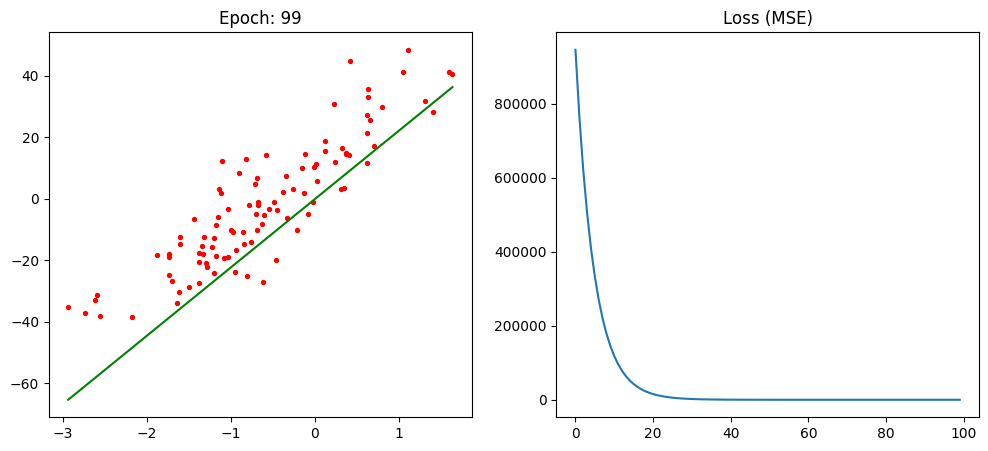

In [16]:
pred_x = [min(X_test), max(X_test)]
pred_y = [m * min(X_test) + b , m * max(X_test) + b]


_, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter( X_test , y_test , c='r', s=8)
axes[0].set_title('Epoch: {0}'.format(epoch))
axes[0].plot( pred_x , pred_y , "g")

# plotting the loss
axes[1].plot(range(0, len(loss)), loss), axes[1].set_title("Loss (MSE)")
plt.show()

## Putting everything together

In [22]:
class our_linear_model():

  def __init__(self, m = 1, b = 1,loss_type = 'mse', learning_rate = 0.1, stop_criteria = 1e-3):
    #
    self.m_ = m
    self.b_ = b
    self.learning_rate = learning_rate
    self.stop_criteria = stop_criteria
    self.loss = []
    self.loss_type = loss_type
    assert loss_type == 'mse' or loss_type == 'mae', ValueError('Wrong Loss Type')

  def predict (self, x):
    return self.m_ * x + self.b_

  def mse (self, y_true, y_pred):
    return np.square(y_true - y_pred).mean()

  def mae (self, y_true, y_pred):
    return None

  def gradient_step (self, m_gradient, b_gradient):
    #
    self.m_ = self.m_ - (self.learning_rate * m_gradient)
    self.b_ = self.b_ - (self.learning_rate * b_gradient)

    return None

  def fit (self, X, y, epochs = 100, display_step = 5):
    #
    steps = len(X)
    for epoch in range(epochs):
      # Gradient initialization
      m_gradient, b_gradient, total_error = 0, 0, 0

      # Compute error and gradients
      for i in range(0, n ):
          #
          prediction = self.predict(X[i])
          error = self.mse(y[i], prediction)

          # Compute the gradients
          if self.loss_type == 'mse':
            m_gradient -= 2 * (y[i] - prediction) * X[i]
            b_gradient -= 2 * (y[i] - prediction)
          elif self.loss_type == 'mae':
            m_gradient = None
            b_gradient = None
          total_error += error

      m_gradient /= n
      b_gradient /= n

      # Update params
      self.gradient_step(m_gradient, b_gradient)

      # Save average error as loss
      self.loss.append(total_error / n)

      # Show everything every display_step epochs
      if epoch % display_step == 0:
          plt.scatter(X, y)
          pred_x = [min(X), max(X)]
          pred_y = [ self.predict(min(X)) , self.predict(max(X)) ]
          plt.title('Epoch: {0}, MSE: {1}'.format(epoch, error))
          plt.plot( pred_x , pred_y , "r")
          plt.show()
          plt.pause(1)
          clear_output(wait=False)

      # Convergence condition
      if max(abs(self.learning_rate * m_gradient), abs(self.learning_rate * b_gradient)) < self.stop_criteria:
          break


In [23]:
model = our_linear_model(loss_type = 'mae')

model.fit (X_train, y_train)

# Print params
print("Computed values are: ", model.m_, model.b_)

Computed values are:  [22.16997028] [-0.04597807]


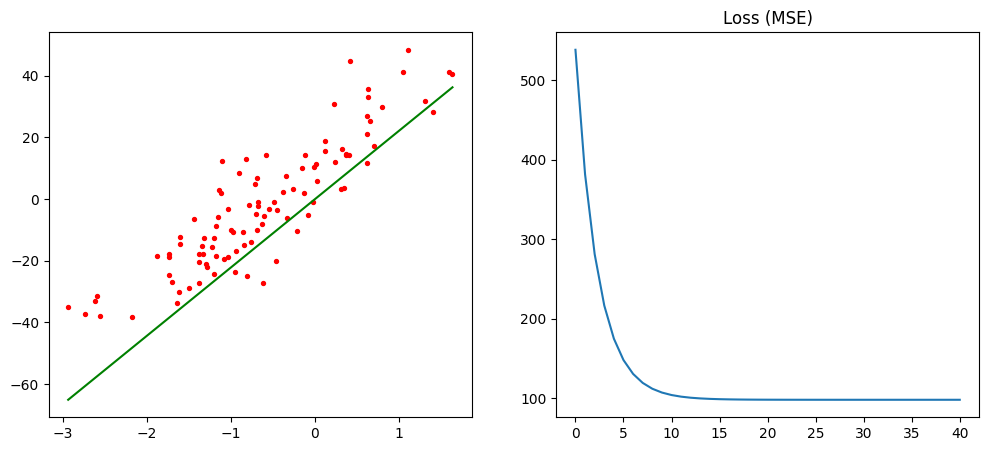

In [24]:
pred_x = [min(X_test), max(X_test)]
pred_y = [model.predict(min(X_test)), model.predict(max(X_test))]


_, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter( X_test , y_test , c='r', s=8)
axes[0].plot( pred_x , pred_y , "g")


axes[1].plot(range(0, len(model.loss)), model.loss), axes[1].set_title("Loss (MSE)")
plt.show()